In [19]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [21]:
from pandas_datareader import data as pdr
from datetime import datetime

In [22]:
from __future__ import division

In [23]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [24]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [25]:
import yfinance as yf
yf.pdr_override()

In [26]:
for stock in tech_list:
     globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
from tabulate import tabulate

for name in tech_list:
    print(f"Description of {name} stock:\n" +
        tabulate(AAPL.describe(),headers="keys",tablefmt="pretty")+"\n\n")

Description of AAPL stock:
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       |        Open        |        High        |        Low         |       Close        |     Adj Close      |       Volume       |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| count |       252.0        |       252.0        |       252.0        |       252.0        |       252.0        |       252.0        |
| mean  | 180.84202418251644 | 182.28138902452258 | 179.50968230716765 | 180.9744050162179  | 180.5360325404576  | 57275526.190476194 |
|  std  | 9.183155938895455  | 9.063059091913862  |  9.10636852379214  | 9.089135498237559  | 9.129634264056785  | 17273312.77535977  |
|  min  | 161.22000122070312 | 162.02999877929688 | 159.77999877929688 | 160.10000610351562 | 159.24998474121094 |     24048300.0     |
|  25%  | 173.1100044

In [28]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.842024,182.281389,179.509682,180.974405,180.536033,5.727553e+07
std,9.183156,9.063059,9.106369,9.089135,9.129634,1.727331e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.404830e+07
25%,173.110004,174.307499,171.874996,173.544998,172.997765,4.674302e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.343105e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [29]:
AAPL['Adj Close']

Date
2023-04-10    161.169724
2023-04-11    159.946259
2023-04-12    159.249985
2023-04-13    164.680969
2023-04-14    164.332840
                 ...    
2024-04-03    169.649994
2024-04-04    168.820007
2024-04-05    169.580002
2024-04-08    168.449997
2024-04-09    169.669998
Name: Adj Close, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

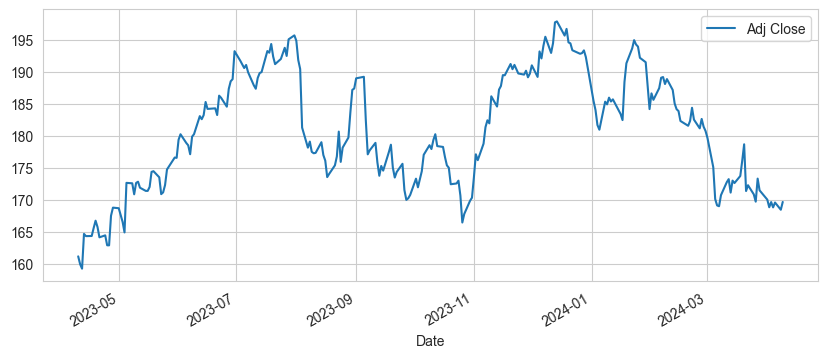

In [30]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

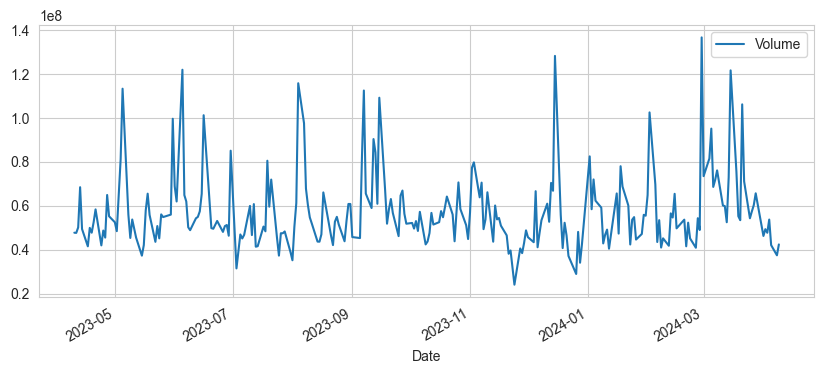

In [31]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [32]:
ma_day=[10,30,50]

for ma in ma_day:
    new_column = 'MA for %s days' %(str(ma))
    AAPL[new_column] = AAPL['Adj Close'].rolling(ma).mean()

In [33]:
ma_day=[10,30,50]

for ma in ma_day:
    new_column = "MA for %s days" %(str(ma))
    AMZN[new_column] = AMZN['Adj Close'].rolling(ma).mean()

In [34]:
ma_day=[10,30,50]

for ma in ma_day:
    new_column = 'MA for %s days' %(str(ma))
    GOOG[new_column] = GOOG['Adj Close'].rolling(ma).mean()

(19552.0, 19583.0)

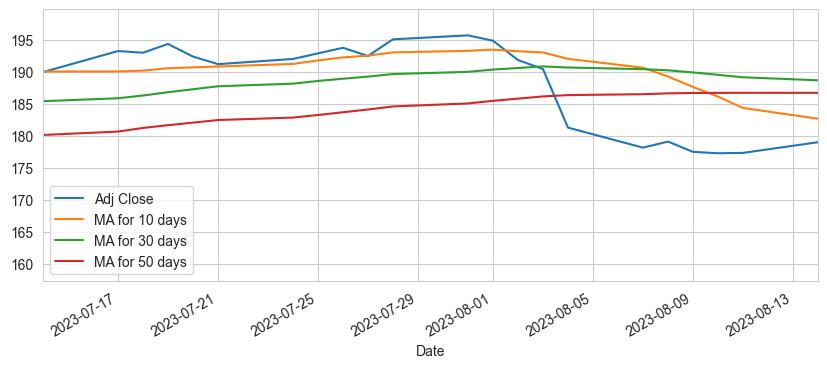

In [35]:
AAPL[['Adj Close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(legend=True,figsize=(10,4))
plt.xlim(datetime(2023,7,14),datetime(2023,8,14))

(19552.0, 19583.0)

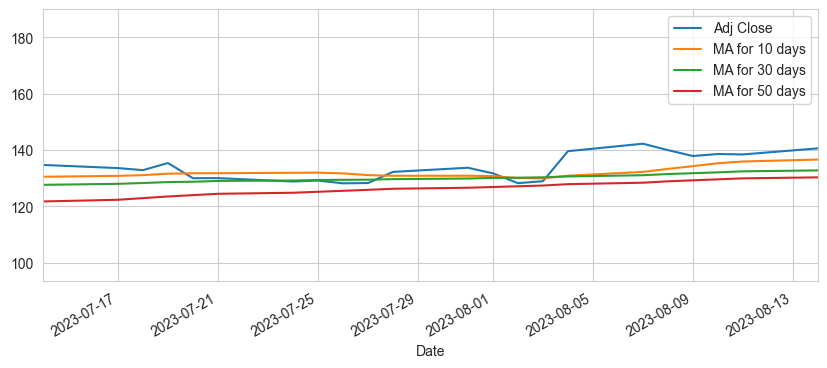

In [36]:
AMZN[['Adj Close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(legend=True,figsize=(10,4))

plt.xlim(datetime(2023,7,14),datetime(2023,8,14))

(19552.0, 19583.0)

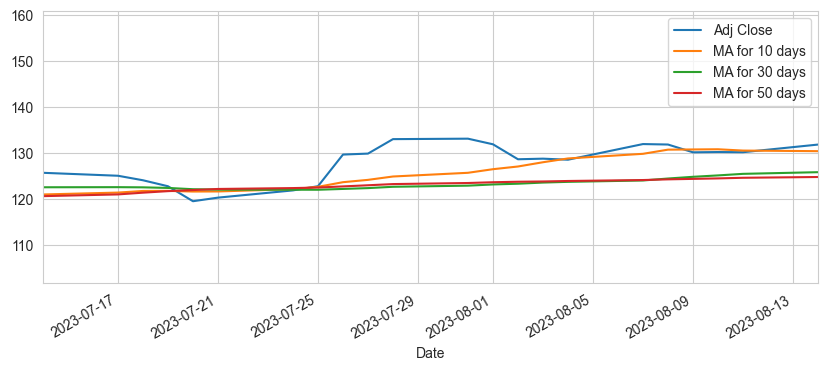

In [37]:
GOOG[['Adj Close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(legend=True,figsize=(10,4))
plt.xlim(datetime(2023,7,14),datetime(2023,8,14))

# Daily Return Analysis

In [38]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() 

In [39]:
AAPL['Daily Return']

Date
2023-04-10         NaN
2023-04-11   -0.007591
2023-04-12   -0.004353
2023-04-13    0.034104
2023-04-14   -0.002114
                ...   
2024-04-03    0.004797
2024-04-04   -0.004892
2024-04-05    0.004502
2024-04-08   -0.006664
2024-04-09    0.007243
Name: Daily Return, Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

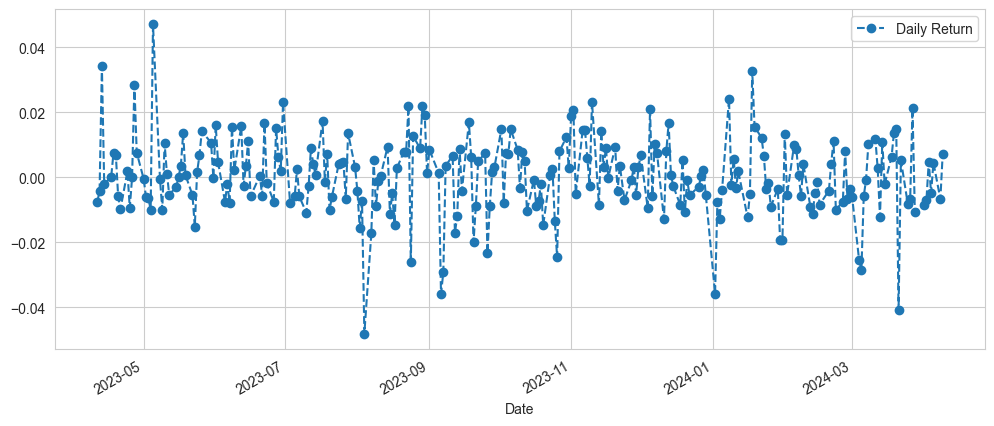

In [40]:
AAPL['Daily Return'].plot(legend=True, figsize=(12,5),linestyle='--',marker='o')

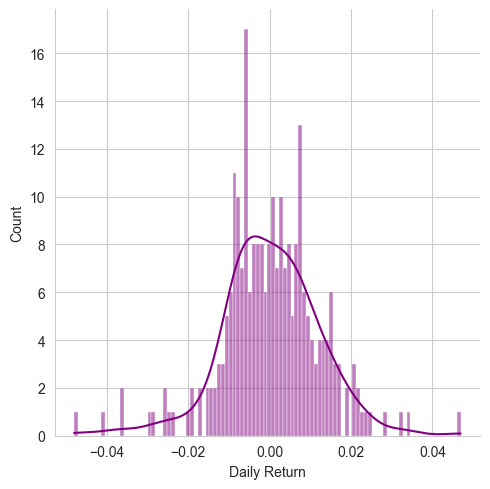

In [41]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True,stat='count')

In [42]:
GOOG

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 30 days,MA for 50 days
Date,,,,,,,,,
2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500,NaN,NaN,NaN
2023-04-11,106.919998,107.220001,105.279999,106.120003,106.120003,18721300,NaN,NaN,NaN
2023-04-12,107.389999,107.586998,104.970001,105.220001,105.220001,22761600,NaN,NaN,NaN
2023-04-13,106.470001,108.264999,106.440002,108.190002,108.190002,21650700,NaN,NaN,NaN
2023-04-14,107.690002,109.580002,107.589996,109.459999,109.459999,20758700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-04-03,154.919998,156.550003,154.132004,156.369995,156.369995,17266200,152.597998,144.295999,145.517599
2024-04-04,155.080002,156.179993,151.880005,151.940002,151.940002,24184800,152.823999,144.565999,145.582799
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800,153.343999,144.853332,145.654599


In [43]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [44]:
closing_df

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-10,161.169724,102.169998,106.949997,287.034210
2023-04-11,159.946274,99.919998,106.120003,280.527588
2023-04-12,159.249985,97.830002,105.220001,281.182220
2023-04-13,164.680984,102.400002,108.190002,287.480530
2023-04-14,164.332855,102.510002,109.459999,283.810699
...,...,...,...,...
2024-04-03,169.649994,182.410004,156.369995,420.450012
2024-04-04,168.820007,180.000000,151.940002,417.880005
2024-04-05,169.580002,185.070007,153.940002,425.519989


In [45]:
tech_rets = closing_df.pct_change()

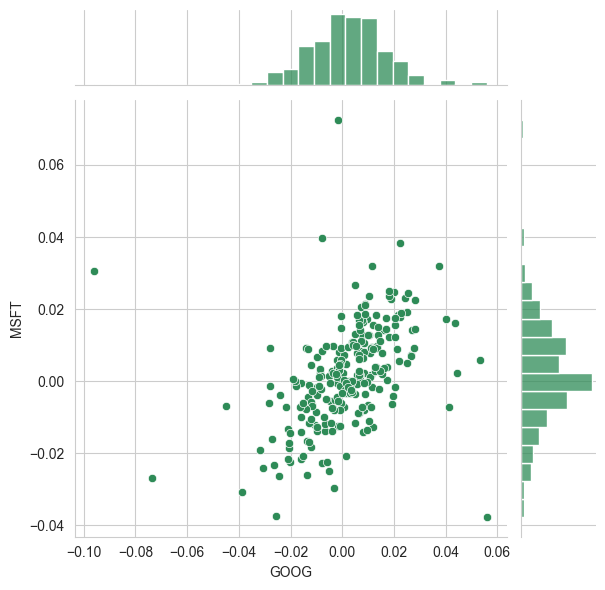

In [46]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

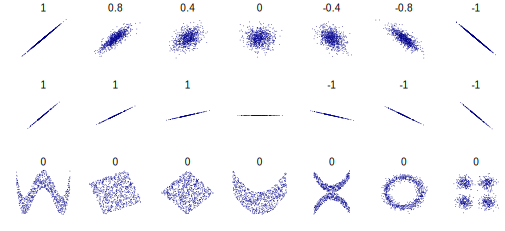

In [47]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

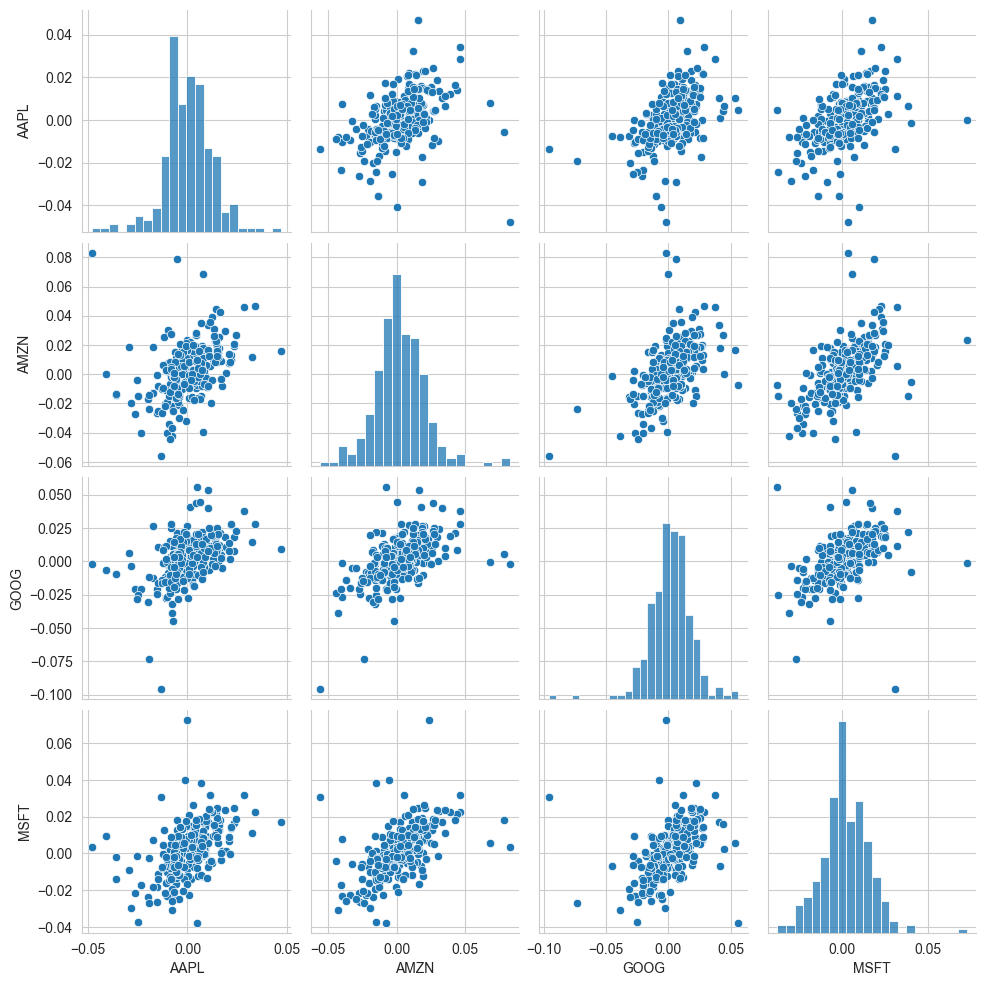

In [48]:
sns.pairplot(tech_rets.dropna())

In [49]:
tech_rets

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-10,NaN,NaN,NaN,NaN
2023-04-11,-0.007591,-0.022022,-0.007761,-0.022668
2023-04-12,-0.004353,-0.020917,-0.008481,0.002334
2023-04-13,0.034104,0.046714,0.028227,0.022399
2023-04-14,-0.002114,0.001074,0.011739,-0.012765
...,...,...,...,...
2024-04-03,0.004797,0.009519,0.003208,-0.002349
2024-04-04,-0.004892,-0.013212,-0.028330,-0.006113
2024-04-05,0.004502,0.028167,0.013163,0.018283


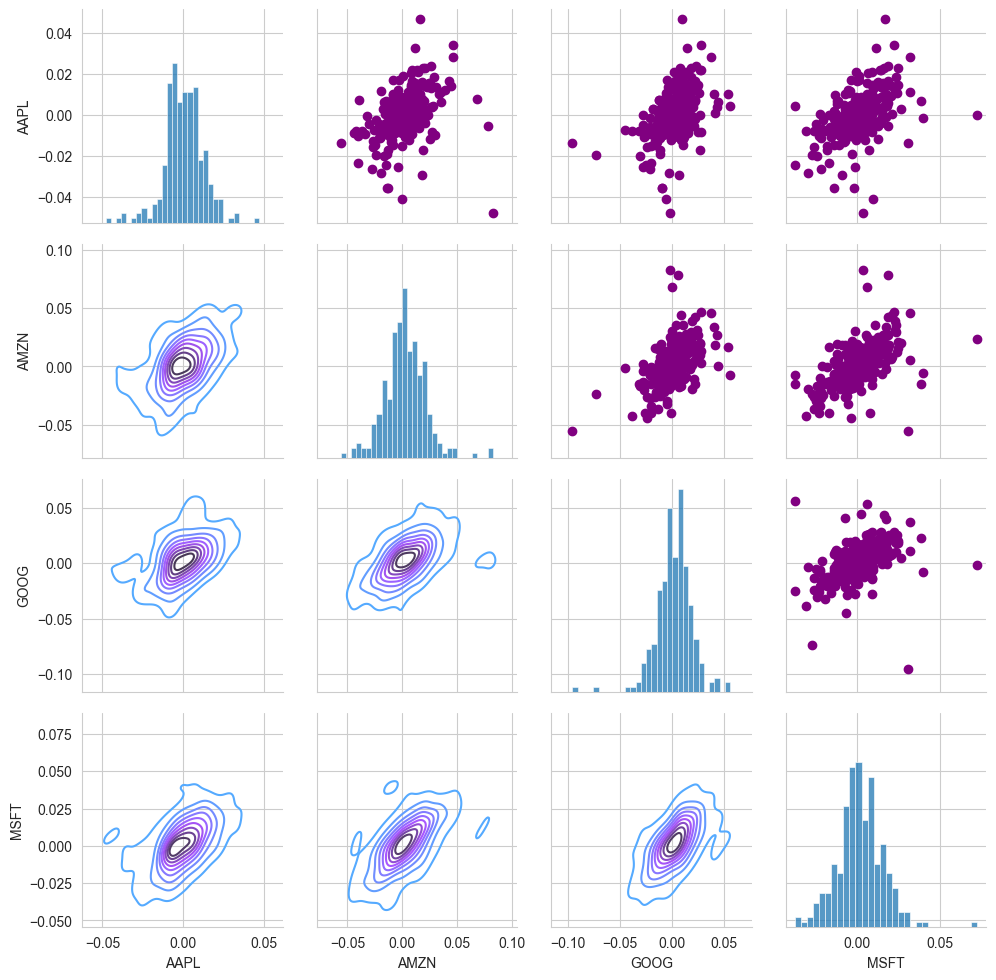

In [50]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

<AxesSubplot:xlabel='Ticker', ylabel='Ticker'>

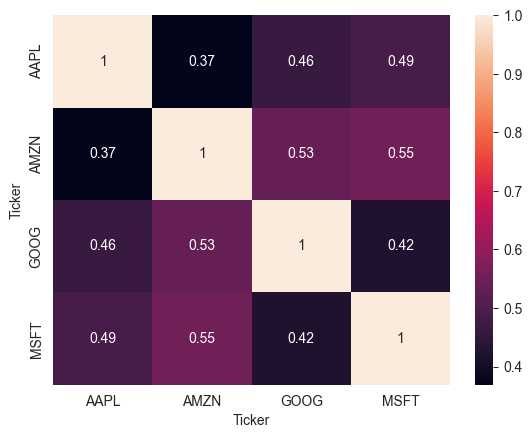

In [51]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

# Risk Analysis

In [52]:
rets = tech_rets.dropna()

rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-11,-0.007591,-0.022022,-0.007761,-0.022668
2023-04-12,-0.004353,-0.020917,-0.008481,0.002334
2023-04-13,0.034104,0.046714,0.028227,0.022399
2023-04-14,-0.002114,0.001074,0.011739,-0.012765
2023-04-17,0.000121,0.002244,-0.027773,0.009296


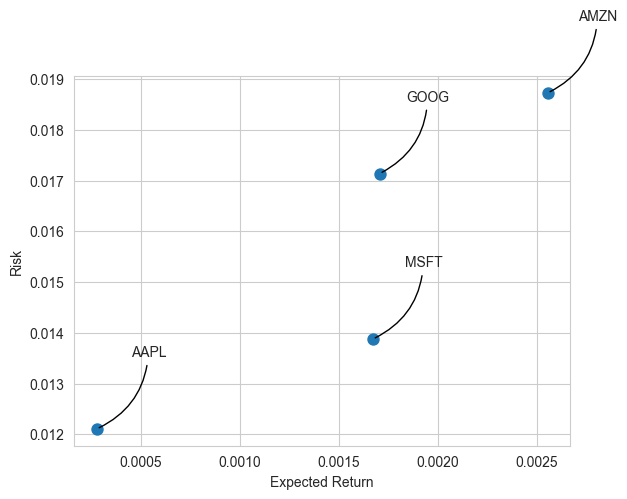

In [53]:
area=np.pi*20

plt.scatter(x=rets.mean(),y=rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))


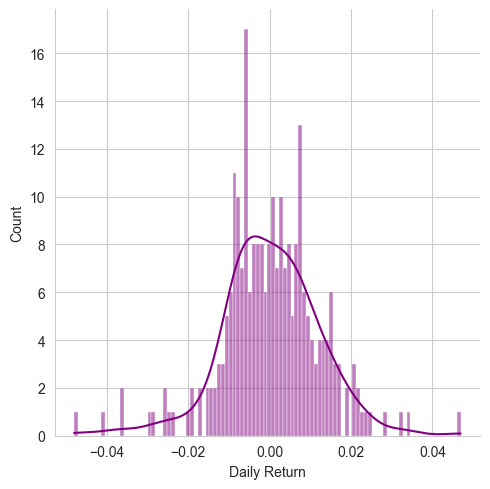

In [54]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

In [55]:
rets['MSFT'].quantile()

0.0014194423766598074